In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# Familiarizarnos con el dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.Gender = df.Gender.map({'Male': 1, 'Female': 2})

In [8]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [11]:
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

### Aplicamos la técnica de Elbow

In [9]:
centers = range(1, 9)

In [10]:
clusters = [KMeans(n_clusters=center, n_init=10) for center in centers]

In [13]:
scores = [model.fit(df).score(df) for model in clusters]

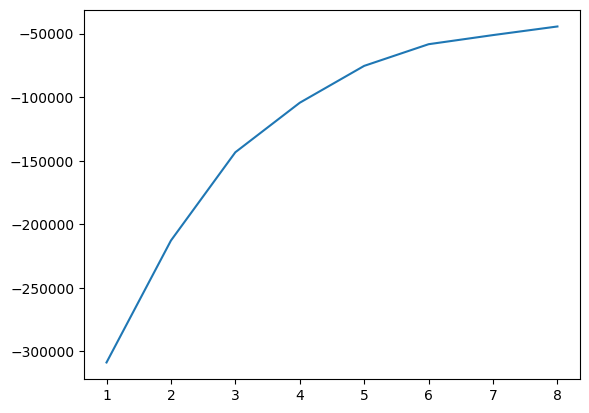

In [15]:
# Graficamos la curva
plt.plot(centers, scores)
plt.show()

In [16]:
k_means_model = KMeans(n_clusters=6, n_init=10)

In [17]:
k_means_model.fit(df)

KMeans(n_clusters=6, n_init=10)

In [18]:
k_means_model.cluster_centers_

array([[56.15555556, 53.37777778, 49.08888889],
       [25.27272727, 25.72727273, 79.36363636],
       [32.69230769, 86.53846154, 82.12820513],
       [41.68571429, 88.22857143, 17.28571429],
       [44.14285714, 25.14285714, 19.52380952],
       [27.        , 56.65789474, 49.13157895]])